In [ ]:
#Libraries used
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
# Writing the analysis in a report
Report_part01 = """
# Adventure Works Sales Data Analysis Report


### This report was generated automatically by the python routine that has the task of analyzing the Adveture Works sales data.
### In addition, statistical results will be presented

"""

In [ ]:
#Files Upload
#Select AdventureWorks.xlsx
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks (1).xlsx


In [ ]:
#Creating DataFrame
df = pd.read_excel("AdventureWorks.xlsx")

In [ ]:
#Exploring the data. Knowing the structure of the worksheet
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
# Renaming the columns
df = df.rename(columns={"Data Venda":"Date Sale", "Data Envio": "Shipping date", "ID Loja":"Store ID", "ID Produto":"Product ID", "ID Cliente":"Customer ID", "No. Venda": "Sale ID", "Custo Unitário": "Unit cost", "Preço Unitário": "Unit price", "Quantidade": "Quantity", "Valor Desconto": "Discount Value", "Valor Venda": "Sale Value", "Produto": "Product", "Fabricante": "Manufacturer", "Marca": "Brand", "Classe": "Class", "Cor": "Color"})

In [ ]:
#Rows and columns
df.shape

(904, 16)

In [ ]:
#Data types
df.dtypes

Date Sale         datetime64[ns]
Shipping date     datetime64[ns]
Store ID                   int64
Product ID                 int64
Customer ID                int64
Sale ID                   object
Unit cost                float64
Unit price               float64
Quantity                   int64
Discount Value           float64
Sale Value               float64
Product                   object
Manufacturer              object
Brand                     object
Class                     object
Color                     object
dtype: object

In [239]:
Report_part02 = """\n
### - 1st analysis: to determine the total revenue, cost and profit for the available data.
\n"""

In [ ]:
# Revenue, cost and profit
df["Cost"] = df["Unit cost"].mul(df["Quantity"]) #Creating the cost column
df["Profit"]  = df["Sale Value"] - df["Cost"] #Creating the profit column
print(f"""**************************
Total revenue:  {round(df["Sale Value"].sum(),2)}
Total cost:     {round(df["Cost"].sum(), 2)}
Total profit:   {round(df["Profit"].sum(),2)}
**************************""")

**************************
Total revenue:  5984606.14
Total cost:     2486783.05
Total profit:   3497823.09
**************************


In [ ]:
# Analyzing product shipping time
# Total days to ship the product column
df["Shipping_time"] = (df["Shipping date"] - df["Date Sale"]).dt.days

**We want to know the average shipping time for each Brand**

In [ ]:
# Shipping_time column type
df["Shipping_time"].dtype

dtype('int64')

In [240]:
Report_part03 = """\n
### - 2nd analysis: to calculate the average of shipping time by Brand
\n"""

In [ ]:
Average_brand = df.groupby("Brand")["Shipping_time"].mean()
Average_brand

Brand
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Shipping_time, dtype: float64

 **Missing Values**

In [ ]:
# Checking if there is some missing data
df.isnull().sum()

Date Sale         0
Shipping date     0
Store ID          0
Product ID        0
Customer ID       0
Sale ID           0
Unit cost         0
Unit price        0
Quantity          0
Discount Value    0
Sale Value        0
Product           0
Manufacturer      0
Brand             0
Class             0
Color             0
Cost              0
Profit            0
Shipping_time     0
dtype: int64

**Profit by Year and by Brand**

In [241]:
Report_part04 = """\n
### - 3rd analysis: the profit group by the Year and Brand
\n"""

In [ ]:
pd.options.display.float_format = '{:20,.2f}'.format
Profit_Year_Brand = df.groupby([df["Date Sale"].dt.year, "Brand"])["Profit"].sum()
Profit_Year_Brand

Date Sale  Brand          
2008       Adventure Works             306,641.16
           Contoso                      56,416.00
           Fabrikam                  1,557,020.55
2009       Adventure Works             405,395.08
           Contoso                     138,258.95
           Fabrikam                  1,034,091.35
Name: Profit, dtype: float64

In [ ]:
# Resetting the index
Profit_year = df.groupby([df["Date Sale"].dt.year, "Brand"])["Profit"].sum().reset_index()
Profit_year

,Date Sale,Brand,Profit
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [242]:
Report_part05 = """\n
### - 4th analysis: the total product sold the following by a bar plot of this result
\n"""

In [ ]:
# Total products sold
Total_Prod = df.groupby("Product")["Quantity"].sum().sort_values(ascending=False)
Total_Prod

Product
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantity, dtype: int64

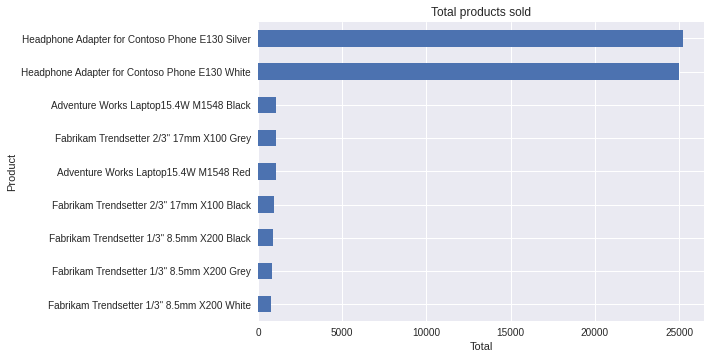

In [ ]:
# Total products sold bar plot
df.groupby("Product")["Quantity"].sum().sort_values(ascending=True).plot.barh(title="Total products sold")
plt.xlabel("Total")
plt.ylabel("Product");
plt.savefig("Total_Prod_Sold.jpg")

In [243]:
Report_part06 = """\n
### - 5th analysis: the following figure shows a bar plot of the profit per year
\n"""

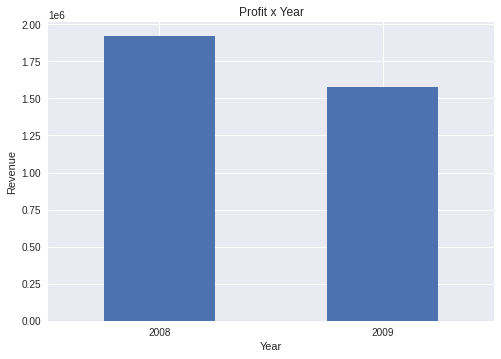

In [ ]:
df.groupby(df["Date Sale"].dt.year)["Profit"].sum().plot.bar(title="Profit x Year")
plt.xlabel("Year")
plt.ylabel("Revenue");
plt.xticks(rotation='horizontal');
plt.savefig("ProfitxYear.jpg")

In [ ]:
Profit_Year = df.groupby(df["Date Sale"].dt.year)["Profit"].sum()
Profit_Year

Date Sale
2008           1,920,077.71
2009           1,577,745.38
Name: Profit, dtype: float64

In [ ]:
# Selecting only 2009 sales
df_2009 = df[df["Date Sale"].dt.year == 2009]
df_2009.head()

,Date Sale,Shipping date,Store ID,Product ID,Customer ID,Sale ID,Unit cost,Unit price,Quantity,Discount Value,Sale Value,Product,Manufacturer,Brand,Class,Color,Cost,Profit,Shipping_time
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


In [244]:
Report_part07 = """\n
### - 6th analysis: the following figure shows the profit per month in the year of 2009
\n"""

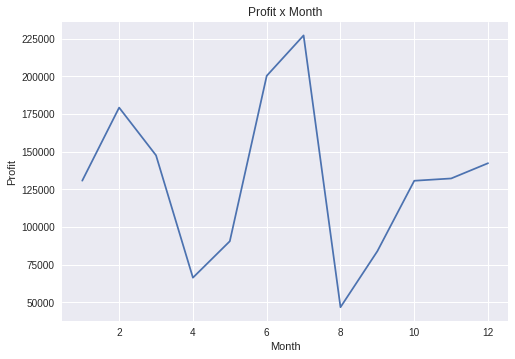

In [ ]:
df_2009.groupby(df_2009["Date Sale"].dt.month)["Profit"].sum().plot(title="Profit x Month")
plt.xlabel("Month")
plt.ylabel("Profit");
plt.savefig("ProfitxMonth.jpg")

In [245]:
Report_part08 = """\n
### - 7th analysis: the following figure shows a bar plot of the profit per brand in the year of 2009
\n"""

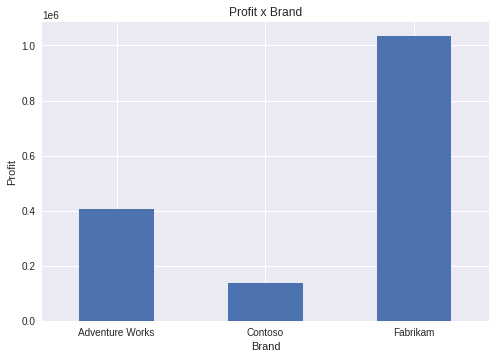

In [ ]:
df_2009.groupby("Brand")["Profit"].sum().plot.bar(title="Profit x Brand")
plt.xlabel("Brand")
plt.ylabel("Profit")
plt.xticks(rotation='horizontal');
plt.savefig("ProfitxBrand.jpg")

In [246]:
Report_part09 = """\n
### - 8th analysis: the following figure shows a bar plot of the profit per class in the year of 2009
\n"""

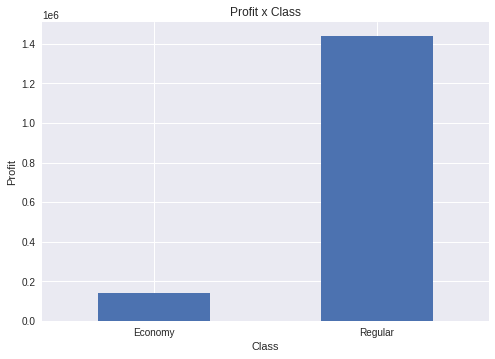

In [ ]:
df_2009.groupby("Class")["Profit"].sum().plot.bar(title="Profit x Class")
plt.xlabel("Class")
plt.ylabel("Profit")
plt.xticks(rotation='horizontal');
plt.savefig("ProfitxClass.jpg")

In [247]:
Report_part10 = """\n
### - 9th analysis: the following table shows some statistics about the shipping time and the following figures show its boxplot and a histogram
\n"""

In [ ]:
Shipping_time_statistics = df["Shipping_time"].describe()
Shipping_time_statistics

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Shipping_time, dtype: float64

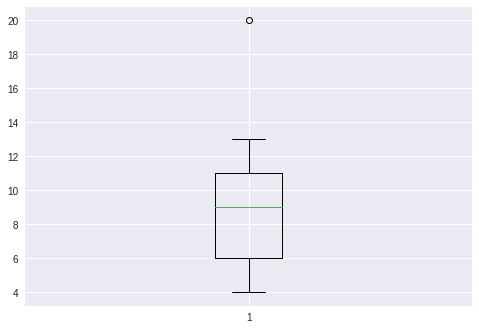

In [ ]:
# Boxplot
plt.boxplot(df["Shipping_time"]);
plt.savefig("Boxplot_Shipping_time.jpg")

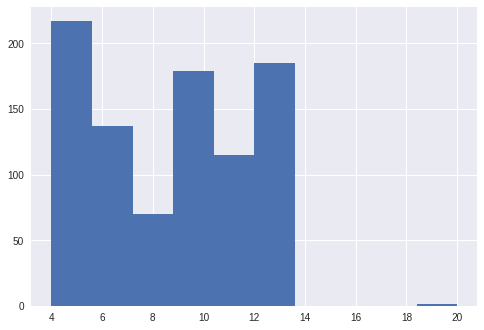

In [ ]:
# Histogram
plt.hist(df["Shipping_time"]);
plt.savefig("Histogram_Shipping_time.jpg")

In [ ]:
# Minimum shipping time
df["Shipping_time"].min()

4

In [ ]:
# Maximum shipping time
df['Shipping_time'].max()

20

In [ ]:
# Identifying the Outlier
df[df["Shipping_time"] == 20]

,Date Sale,Shipping date,Store ID,Product ID,Customer ID,Sale ID,Unit cost,Unit price,Quantity,Discount Value,Sale Value,Product,Manufacturer,Brand,Class,Color,Cost,Profit,Shipping_time
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [ ]:
df.to_csv("df_NewData.csv", index=False)

In [249]:
# Writing the analysis in a report
report = open('Report.md','w')
report.write(Report_part01)
report.write(Report_part02)
report.write(f"""**************************
Total revenue:  {round(df["Sale Value"].sum(),2)}

Total cost:     {round(df["Cost"].sum(), 2)}

Total profit:   {round(df["Profit"].sum(),2)}

**************************""")
report.write(Report_part03)
report.write(Average_brand.to_markdown())
report.write(Report_part04)
report.write(Profit_Year_Brand.to_markdown())
report.write(Report_part05)
report.write(Total_Prod.to_markdown())
report.write("""\n
<img src = "Total_Prod_Sold.jpg">
\n""")
report.write(Report_part06)
report.write("""\n
<img src = "ProfitxYear.jpg">
\n""")
report.write(Profit_Year.to_markdown())
report.write(Report_part07)
report.write("""\n
<img src = "ProfitxMonth.jpg">
\n""")
report.write(Report_part08)
report.write("""\n
<img src = "ProfitxBrand.jpg">
\n""")
report.write(Report_part09)
report.write("""\n
<img src = "ProfitxClass.jpg">
\n""")
report.write(Report_part10)
report.write(Shipping_time_statistics.to_markdown())
report.write("""\n
<img src = "Boxplot_Shipping_time.jpg">
\n""")
report.write("""\n
<img src = "Histogram_Shipping_time.jpg">
\n""")

45